# Diseño de esquema estrella

In [1]:
import pandas as pd

## Carga de datos

In [2]:
# Cargar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargar base csv
df = pd.read_csv('/content/drive/MyDrive/Consultoria/datos_abiertos_seguridad_convivencia/data/raw/df_combined_all_years_2020_24.csv')

/tmp/ipython-input-2487513603.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Consultoria/datos_abiertos_seguridad_convivencia/data/raw/df_combined_all_years_2020_24.csv')


## Diseño de dimensiones





El primer paso es inspeccionar las columnas, los tipos de datos y los datos de muestra del marco de datos para identificar posibles dimensiones para el esquema en estrella.



In [4]:
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217120 entries, 0 to 5217119
Data columns (total 17 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   ARMAS_MEDIOS                                     object 
 1   FECHA                                            object 
 2   CANTIDAD                                         float64
 3   TIPO_DELITO                                      object 
 4   GENERO                                           object 
 5   AGRUPA_EDAD_PERSONA                              object 
 6   DELITO                                           object 
 7   Código Departamento                              int64  
 8   Nombre Departamento                              object 
 9   Código Municipio                                 int64  
 10  Nombre Municipio                                 object 
 11  Tipo: Municipio / Isla / Área no municipalizada  object 
 12  longitud      

,ARMAS_MEDIOS,FECHA,CANTIDAD,TIPO_DELITO,GENERO,AGRUPA_EDAD_PERSONA,DELITO,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,longitud,Latitud,AÑO,ÁREA GEOGRÁFICA,TOTAL
2463716,VEHICULO,2021-04-23 00:00:00,5.0,LESIONES EN ACCIDENTE DE TRÁNSITO,MASCULINO,ADULTOS,NaN,63,QUINDÍO,63111,BUENAVISTA,Municipio,"-75,739572","4,360029",2022.0,Total,22031.0
507919,SIN EMPLEO DE ARMAS,2022-07-25,1.0,AMENAZAS,FEMENINO,ADULTOS,NaN,5,ANTIOQUIA,5670,SAN ROQUE,Municipio,"-75,019109","6,485939",2020.0,Total,22742.0
3667493,SIN EMPLEO DE ARMAS,2024-02-18,1.0,LESIONES EN ACCIDENTE DE TRÁNSITO,FEMENINO,ADULTOS,NaN,5,ANTIOQUIA,5400,LA UNIÓN,Municipio,"-75,360874","5,973845",2023.0,NaN,13736.0
3732074,ARMA BLANCA / CORTOPUNZANTE,2023-01-01,1.0,LESIONES PERSONALES,MASCULINO,ADULTOS,NaN,5,ANTIOQUIA,5697,EL SANTUARIO,Municipio,"-75,265465","6,136871",2024.0,NaN,39396.0
264496,ARMA BLANCA / CORTOPUNZANTE,2020-10-17,1.0,HURTO A ENTIDADES COMERCIALES,NaN,NaN,NaN,5,ANTIOQUIA,5129,CALDAS,Municipio,"-75,633673","6,091077",2020.0,Total,84640.0
3823257,SIN EMPLEO DE ARMAS,2023-01-19,2.0,HURTO A PERSONAS,MASCULINO,ADULTOS,NaN,8,ATLÁNTICO,8758,SOLEDAD,Municipio,"-74,786054","10,909921",2024.0,NaN,710269.0
1202501,ARMA BLANCA / CORTOPUNZANTE,2020-07-03,1.0,LESIONES PERSONALES,MASCULINO,ADULTOS,NaN,19,CAUCA,19701,SANTA ROSA,Municipio,"-76,573252","1,700916",2022.0,Total,5345.0
4167717,SIN EMPLEO DE ARMAS,2023-11-07,1.0,VIOLENCIA INTRAFAMILIAR,FEMENINO,ADULTOS,NaN,23,CÓRDOBA,23660,SAHAGÚN,Municipio,"-75,445834","8,943048",2024.0,NaN,118572.0
1260397,NO REPORTADO,2020-04-24,1.0,VIOLENCIA INTRAFAMILIAR,FEMENINO,ADOLESCENTES,NaN,20,CESAR,20011,AGUACHICA,Municipio,"-73,614027","8,306811",2020.0,Total,119365.0
5061703,SIN EMPLEO DE ARMAS,2024-06-05,1.0,VIOLENCIA INTRAFAMILIAR,FEMENINO,ADULTOS,NaN,76,VALLE DEL CAUCA,76318,GUACARÍ,Municipio,"-76,330911","3,761815",2024.0,NaN,34561.0


## Creación de las tablas de dimensiones


Para cada dimensión identificada, se crea un nuevo marco de datos que contenga valores únicos y una clave principal generada.


In [5]:
dim_arma_medio = df[['ARMAS_MEDIOS']].drop_duplicates().reset_index(drop=True)
dim_arma_medio['id_arma_medio'] = dim_arma_medio.index

dim_tipo_delito = df[['TIPO_DELITO']].drop_duplicates().reset_index(drop=True)
dim_tipo_delito['id_tipo_delito'] = dim_tipo_delito.index

dim_genero = df[['GENERO']].drop_duplicates().reset_index(drop=True)
dim_genero['id_genero'] = dim_genero.index

dim_agrupa_edad_persona = df[['AGRUPA_EDAD_PERSONA']].drop_duplicates().reset_index(drop=True)
dim_agrupa_edad_persona['id_agrupa_edad_persona'] = dim_agrupa_edad_persona.index

dim_delito = df[['DELITO']].drop_duplicates().reset_index(drop=True)
dim_delito['id_delito'] = dim_delito.index

dim_ubicacion = df[['Código Departamento', 'Nombre Departamento', 'Código Municipio', 'Nombre Municipio', 'Tipo: Municipio / Isla / Área no municipalizada']].drop_duplicates().reset_index(drop=True)
dim_ubicacion['id_ubicacion'] = dim_ubicacion.index

dim_año = df[['AÑO']].drop_duplicates().reset_index(drop=True)
dim_año['id_año'] = dim_año.index

dim_area_geografica = df[['ÁREA GEOGRÁFICA']].drop_duplicates().reset_index(drop=True)
dim_area_geografica['id_area_geografica'] = dim_area_geografica.index

df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
dim_fecha = df[['FECHA']].drop_duplicates().dropna().reset_index(drop=True)
dim_fecha['id_fecha'] = dim_fecha.index

display(dim_arma_medio.head())
display(dim_tipo_delito.head())
display(dim_genero.head())
display(dim_agrupa_edad_persona.head())
display(dim_delito.head())
display(dim_ubicacion.head())
display(dim_año.head())
display(dim_area_geografica.head())
display(dim_fecha.head())

,ARMAS_MEDIOS,id_arma_medio
0,ARMA DE FUEGO,0
1,PALANCAS,1
2,ARMA BLANCA / CORTOPUNZANTE,2
3,SIN EMPLEO DE ARMAS,3
4,BICICLETA,4


,TIPO_DELITO,id_tipo_delito
0,HURTO PIRATERÍA TERRESTRE,0
1,SECUESTRO,1
2,HOMICIDIO EN ACCIDENTE DE TRÁNSITO,2
3,VIOLENCIA INTRAFAMILIAR,3
4,HURTO A PERSONAS,4


,GENERO,id_genero
0,NaN,0
1,FEMENINO,1
2,MASCULINO,2
3,NO REPORTA,3
4,NO RESPORTADO,4


,AGRUPA_EDAD_PERSONA,id_agrupa_edad_persona
0,NaN,0
1,MENORES,1
2,ADULTOS,2
3,ADOLESCENTES,3
4,NO REPORTA,4


,DELITO,id_delito
0,NaN,0
1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,1
2,ARTÍCULO 206. ACTO SEXUAL VIOLENTO,2
3,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,3
4,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,4


,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,id_ubicacion
0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,0
1,5,ANTIOQUIA,5002,ABEJORRAL,Municipio,1
2,5,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,2
3,5,ANTIOQUIA,5021,ALEJANDRÍA,Municipio,3
4,5,ANTIOQUIA,5030,AMAGÁ,Municipio,4


,AÑO,id_año
0,2020.0,0
1,2021.0,1
2,2022.0,2
3,NaN,3
4,2023.0,4


,ÁREA GEOGRÁFICA,id_area_geografica
0,Total,0
1,NaN,1


,FECHA,id_fecha
0,2020-08-21,0
1,2020-10-14,1
2,2020-11-18,2
3,2020-12-22,3
4,2020-03-18,4


## Tabla de hechos (fact table)


Se identifican las columnas de hechos y se crea un nuevo marco de datos para la tabla de hechos, reemplazando las columnas de dimensión originales con las nuevas claves principales de las tablas de dimensión.

Se crea la tabla de hechos seleccionando las columnas especificadas y luego se combinan con cada tabla de dimensión para reemplazar las columnas de dimensión originales con sus respectivas claves principales.


In [6]:
fact_table = df[['CANTIDAD', 'longitud', 'Latitud', 'TOTAL', 'ARMAS_MEDIOS', 'TIPO_DELITO', 'GENERO', 'AGRUPA_EDAD_PERSONA', 'DELITO', 'Código Departamento', 'Nombre Departamento', 'Código Municipio', 'Nombre Municipio', 'Tipo: Municipio / Isla / Área no municipalizada', 'AÑO', 'ÁREA GEOGRÁFICA', 'FECHA']].copy()

fact_table = pd.merge(fact_table, dim_arma_medio, on='ARMAS_MEDIOS', how='left')
fact_table = fact_table.drop('ARMAS_MEDIOS', axis=1)

fact_table = pd.merge(fact_table, dim_tipo_delito, on='TIPO_DELITO', how='left')
fact_table = fact_table.drop('TIPO_DELITO', axis=1)

fact_table = pd.merge(fact_table, dim_genero, on='GENERO', how='left')
fact_table = fact_table.drop('GENERO', axis=1)

fact_table = pd.merge(fact_table, dim_agrupa_edad_persona, on='AGRUPA_EDAD_PERSONA', how='left')
fact_table = fact_table.drop('AGRUPA_EDAD_PERSONA', axis=1)

fact_table = pd.merge(fact_table, dim_delito, on='DELITO', how='left')
fact_table = fact_table.drop('DELITO', axis=1)

fact_table = pd.merge(fact_table, dim_ubicacion, on=['Código Departamento', 'Nombre Departamento', 'Código Municipio', 'Nombre Municipio', 'Tipo: Municipio / Isla / Área no municipalizada'], how='left')
fact_table = fact_table.drop(['Código Departamento', 'Nombre Departamento', 'Código Municipio', 'Nombre Municipio', 'Tipo: Municipio / Isla / Área no municipalizada'], axis=1)

fact_table = pd.merge(fact_table, dim_año, on='AÑO', how='left')
fact_table = fact_table.drop('AÑO', axis=1)

fact_table = pd.merge(fact_table, dim_area_geografica, on='ÁREA GEOGRÁFICA', how='left')
fact_table = fact_table.drop('ÁREA GEOGRÁFICA', axis=1)

fact_table = pd.merge(fact_table, dim_fecha, on='FECHA', how='left')
fact_table = fact_table.drop('FECHA', axis=1)

display(fact_table.head())

,CANTIDAD,longitud,Latitud,TOTAL,id_arma_medio,id_tipo_delito,id_genero,id_agrupa_edad_persona,id_delito,id_ubicacion,id_año,id_area_geografica,id_fecha
0,1.0,"-75,581775","6,246631",2489955.0,0,0,0,0,0,0,0,0,0.0
1,1.0,"-75,581775","6,246631",2507620.0,0,0,0,0,0,0,1,0,0.0
2,1.0,"-75,581775","6,246631",2514709.0,0,0,0,0,0,0,2,0,0.0
3,1.0,"-75,581775","6,246631",2489955.0,0,0,0,0,0,0,0,0,1.0
4,1.0,"-75,581775","6,246631",2507620.0,0,0,0,0,0,0,1,0,1.0




* Las posibles columnas de dimensión identificadas incluyen "ARMAS\_MEDIOS", "FECHA", "TIPO\_DELITO", "GÉNERO", "AGRUPA\_EDAD\_PERSONA", "DELITO", las columnas geográficas "AÑO" y "ÁREA GEOGRÁFICA".
* Las posibles columnas de hechos identificadas incluyen "CANTIDAD", "Longitud", "Latitud" y "TOTAL".
* Se crearon correctamente tablas de dimensiones para cada dimensión identificada, que contienen valores únicos y una clave primaria generada.
* La tabla de hechos se creó seleccionando las columnas de hechos y reemplazando las columnas de dimensión originales con las claves primarias de las tablas de dimensiones mediante operaciones de fusión.




### Ejemplos de consulta

Ver las primeras filas de `fact_table` para ver cómo las claves principales de las tablas de dimensiones han reemplazado las columnas de dimensiones originales.

In [7]:
display(fact_table.head())

,CANTIDAD,longitud,Latitud,TOTAL,id_arma_medio,id_tipo_delito,id_genero,id_agrupa_edad_persona,id_delito,id_ubicacion,id_año,id_area_geografica,id_fecha
0,1.0,"-75,581775","6,246631",2489955.0,0,0,0,0,0,0,0,0,0.0
1,1.0,"-75,581775","6,246631",2507620.0,0,0,0,0,0,0,1,0,0.0
2,1.0,"-75,581775","6,246631",2514709.0,0,0,0,0,0,0,2,0,0.0
3,1.0,"-75,581775","6,246631",2489955.0,0,0,0,0,0,0,0,0,1.0
4,1.0,"-75,581775","6,246631",2507620.0,0,0,0,0,0,0,1,0,1.0


Consulta para encontrar la CANTIDAD total de cada ARMAS_MEDIOS. Se unen la tabla fact_table con la tabla dim_arma_medio.

In [8]:
# Join fact_table with dim_arma_medio to get the ARMA_MEDIOS names
query_result = pd.merge(fact_table, dim_arma_medio, left_on='id_arma_medio', right_on='id_arma_medio', how='left')

# Group by ARMA_MEDIOS and sum the CANTIDAD
query_result = query_result.groupby('ARMAS_MEDIOS')['CANTIDAD'].sum().reset_index()

# Display the result
display(query_result)

,ARMAS_MEDIOS,CANTIDAD
0,-,14754.0
1,ACIDO,1485.0
2,AGUA CALIENTE,528.0
3,ALIMENTOS VENCIDOS,491.0
4,ALMOHADA,42.0
5,ALUCINOGENOS,104.0
6,ARMA BLANCA / CORTOPUNZANTE,662797.0
7,ARMA DE FUEGO,907607.0
8,ARMA TRAUMATICA,5107.0
9,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,4080.0


In [9]:
# Join fact_table with dim_ubicacion to get the department names
query_result = pd.merge(fact_table, dim_ubicacion, left_on='id_ubicacion', right_on='id_ubicacion', how='left')

# Group by department name and count the number of rows
query_result = query_result.groupby('Nombre Departamento').size().reset_index(name='Number of Crimes')

# Display the result
display(query_result)

,Nombre Departamento,Number of Crimes
0,AMAZONAS,9400
1,ANTIOQUIA,814768
2,ARAUCA,25554
3,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",27024
4,ATLÁNTICO,266391
5,"BOGOTÁ, D.C.",4
6,BOLÍVAR,122387
7,BOYACÁ,197622
8,CALDAS,97679
9,CAQUETÁ,80296


In [10]:
# Join fact_table with dim_tipo_delito to get the crime type names
query_result = pd.merge(fact_table, dim_tipo_delito, left_on='id_tipo_delito', right_on='id_tipo_delito', how='left')

# Group by crime type name and count the number of rows
query_result = query_result.groupby('TIPO_DELITO').size().reset_index(name='Number of Crimes')

# Display the result
display(query_result)

,TIPO_DELITO,Number of Crimes
0,AMENAZAS,543531
1,DELITOS SEXUALES,360788
2,EXTORSIÓN,122217
3,HOMICIDIO EN ACCIDENTE DE TRÁNSITO,39751
4,HOMICIDIO INTENCIONAL,55077
5,HURTO A ENTIDADES COMERCIALES,158485
6,HURTO A ENTIDADES FINANCIERAS,1142
7,HURTO A PERSONAS,1330169
8,HURTO AUTOMOTORES,69204
9,HURTO CABEZAS GANADO,35777


# Informe

Aquí inicia el informe con los análisis y visualizaciones de la base de datos consolidada.

## Datos faltantes

In [12]:
# Identificar datos faltantes por columna
missing_data = df.isnull().sum()

# Mostrar la cantidad de datos faltantes por columna
display(missing_data)

# Opcional: Mostrar el porcentaje de datos faltantes por columna
# missing_data_percentage = (df.isnull().sum() / len(df)) * 100
# display(missing_data_percentage)

,0
ARMAS_MEDIOS,1659
FECHA,5183426
CANTIDAD,228
TIPO_DELITO,228
GENERO,561126
AGRUPA_EDAD_PERSONA,554334
DELITO,4855171
Código Departamento,0
Nombre Departamento,0
Código Municipio,0


In [13]:
# Seleccionar columnas numéricas
numerical_cols = df.select_dtypes(include=['number']).columns

# Mostrar las columnas numéricas
print("Columnas numéricas:")
display(numerical_cols)

Columnas numéricas:


Index(['CANTIDAD', 'Código Departamento', 'Código Municipio', 'AÑO', 'TOTAL'], dtype='object')

Las variables que se identifican como numéricas, son en su mayoría, categóricas en su naturaleza. Es el caso de los códigos -de departamento y municipio-.

## Variables numéricas

In [14]:
# Seleccionar las columnas 'CANTIDAD' y 'TOTAL'
selected_cols = df[['CANTIDAD', 'TOTAL']]

# Calcular las estadísticas descriptivas (medidas de tendencia central y dispersión)
descriptive_stats = selected_cols.describe()

# Mostrar las estadísticas descriptivas
print("Medidas de tendencia central y dispersión para 'CANTIDAD' y 'TOTAL':")
display(descriptive_stats)

Medidas de tendencia central y dispersión para 'CANTIDAD' y 'TOTAL':


,CANTIDAD,TOTAL
count,5.216892e+06,5.216690e+06
mean,1.381284e+00,2.642275e+05
std,1.461436e+00,4.923356e+05
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,2.164200e+04
50%,1.000000e+00,7.254500e+04
75%,1.000000e+00,3.056760e+05
max,8.000000e+01,7.849206e+06


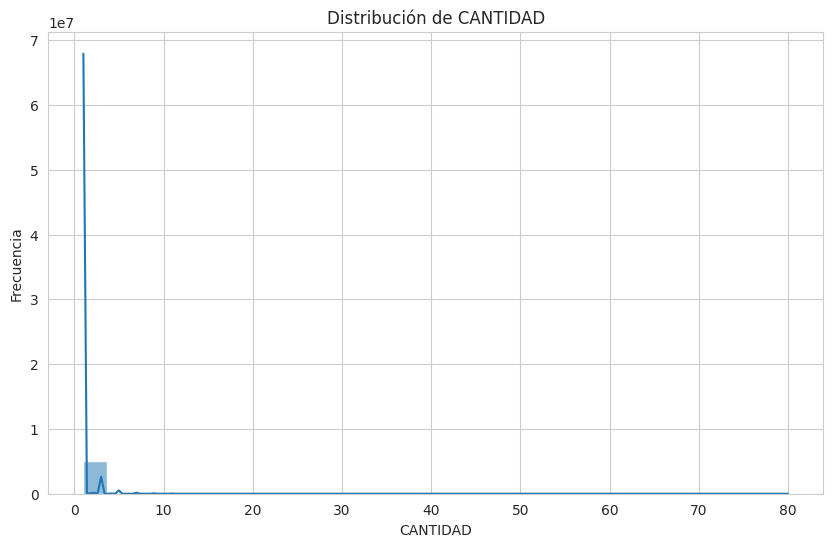

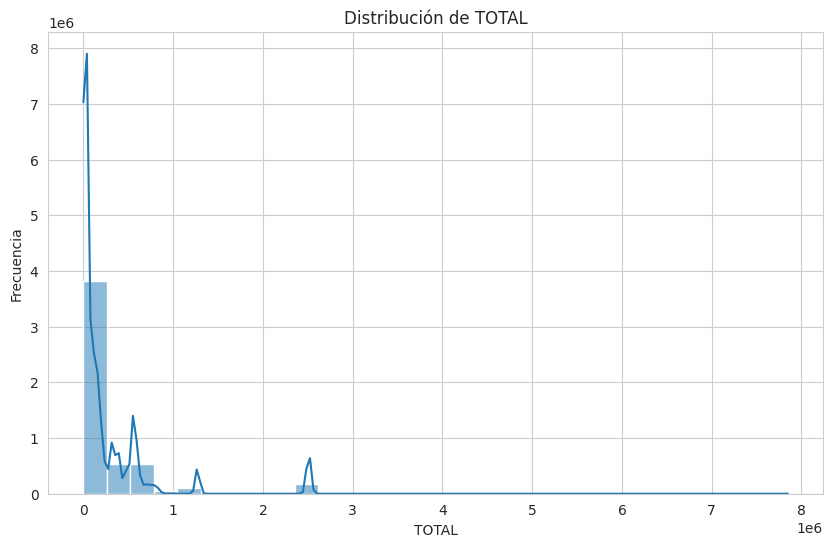

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las visualizaciones
sns.set_style("whitegrid")

# Crear histograma para 'CANTIDAD'
plt.figure(figsize=(10, 6))
sns.histplot(df['CANTIDAD'].dropna(), bins=30, kde=True)
plt.title('Distribución de CANTIDAD')
plt.xlabel('CANTIDAD')
plt.ylabel('Frecuencia')
plt.show()

# Crear histograma para 'TOTAL'
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL'].dropna(), bins=30, kde=True)
plt.title('Distribución de TOTAL')
plt.xlabel('TOTAL')
plt.ylabel('Frecuencia')
plt.show()

Al ser, la variable "Cantidad", un conteo uno a uno de los delitos que se describen, la totalidad de los registros debería recaer en 1. Se puede ver que hay alguna irregularidad en los datos al tener componentes de la distribución en otros valores.

Total, es una variable que proviene de los Censos de población y que muestra la población total de los municipios.

## Variables categóricas

In [17]:
# Seleccionar columnas categóricas (tipo 'object')
categorical_cols = df.select_dtypes(include=['object']).columns

# Mostrar las columnas categóricas
print("Columnas categóricas:")
display(categorical_cols)

Columnas categóricas:


Index(['ARMAS_MEDIOS', 'TIPO_DELITO', 'GENERO', 'AGRUPA_EDAD_PERSONA',
       'DELITO', 'Nombre Departamento', 'Nombre Municipio',
       'Tipo: Municipio / Isla / Área no municipalizada', 'longitud',
       'Latitud', 'ÁREA GEOGRÁFICA'],
      dtype='object')

Variables categóricas:
- Armas Medios
- Tipo Delito
- Género
- Agrupa edad persona
- Delito
- Nombre departamento
- Nombre municipio
- Tipo
- Longitud
- Latitud
- Área Geográfica

Las variables latitud y longitud son reconocidas como variables categóricas. Esto sugiere que será necesario hacer una transformación para que se reflejen como variables geográficas.  

In [18]:
# Calcular y mostrar la frecuencia de cada variable categórica
for col in categorical_cols:
    print(f"\nFrecuencia de la columna: {col}")
    display(df[col].value_counts())


Frecuencia de la columna: ARMAS_MEDIOS


,count
ARMAS_MEDIOS,
SIN EMPLEO DE ARMAS,2557100
CONTUNDENTES,903810
ARMA DE FUEGO,622485
ARMA BLANCA / CORTOPUNZANTE,511204
VEHICULO,127934
NO REPORTADO,109607
MOTO,80633
PALANCAS,71890
LLAMADA TELEFONICA,59796



Frecuencia de la columna: TIPO_DELITO


,count
TIPO_DELITO,
HURTO A PERSONAS,1330169
LESIONES PERSONALES,959493
AMENAZAS,543531
VIOLENCIA INTRAFAMILIAR,462088
LESIONES EN ACCIDENTE DE TRÁNSITO,383289
HURTO RESIDENCIAS,367753
DELITOS SEXUALES,360788
HURTO MOTOCICLETAS,318771
HURTO A ENTIDADES COMERCIALES,158485



Frecuencia de la columna: GENERO


,count
GENERO,
MASCULINO,2517618
FEMENINO,2134418
NO REPORTADO,1497
NO REPORTA,1201
NO RESPORTADO,1029
-,117
NO REPORTADO,114



Frecuencia de la columna: AGRUPA_EDAD_PERSONA


,count
AGRUPA_EDAD_PERSONA,
ADULTOS,4145859
ADOLESCENTES,285662
MENORES,217530
-,5199
NO REPORTADO,3180
,3006
NO REPORTA,1201
NO RESPORTADO,1029
NO REPORTADO,120



Frecuencia de la columna: DELITO


,count
DELITO,
ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,127289
ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS,79160
ARTÍCULO 205. ACCESO CARNAL VIOLENTO,51214
ARTÍCULO 206. ACTO SEXUAL VIOLENTO,34802
ARTÍCULO 210 A. ACOSO SEXUAL,25619
ARTÍCULO 210. ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR,17151
ARTÍCULO 218. PORNOGRAFÍA CON MENORES,11124
ARTÍCULO 207. ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR,5795
ARTÍCULO 219 A. UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PARA OFRECER SERVICIOS SEXUALES DE MENORES,3123



Frecuencia de la columna: Nombre Departamento


,count
Nombre Departamento,
ANTIOQUIA,814768
CUNDINAMARCA,532293
SANTANDER,443817
VALLE DEL CAUCA,360495
ATLÁNTICO,266391
NARIÑO,260951
CAUCA,255524
META,220108
TOLIMA,199215



Frecuencia de la columna: Nombre Municipio


,count
Nombre Municipio,
MEDELLÍN,179958
ARMENIA,164188
LA UNIÓN,133632
GRANADA,130599
VILLANUEVA,112704
...,...
SANTA CRUZ DE MOMPOX,2
SAN ANDRÉS DE SOTAVENTO,2
SOTARÁ - PAISPAMBA,2



Frecuencia de la columna: Tipo: Municipio / Isla / Área no municipalizada


,count
Tipo: Municipio / Isla / Área no municipalizada,
Municipio,5181914
Isla,24592
Área no municipalizada,10614



Frecuencia de la columna: longitud


,count
longitud,
"-75,581775",179958
"-74,815546",106379
"-73,622601",89814
"-73,132562",82750
"-75,680786",82094
...,...
"-70,98893",2
"-72,791889",2
"-69,741745",2



Frecuencia de la columna: Latitud


,count
Latitud,
"6,246631",179958
"10,977961",106379
"4,126369",89814
"7,11647",82750
"4,53598",82094
...,...
"-1,005674",2
"-2,890126",2
"1,912495",2



Frecuencia de la columna: ÁREA GEOGRÁFICA


,count
ÁREA GEOGRÁFICA,
Total,3476580


Se evidencian inconsistencias an algunas respuestas que, por errores de digitación, aparecen como etiquetas diferentes, es el caso de "no reportado".

/tmp/ipython-input-538419659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


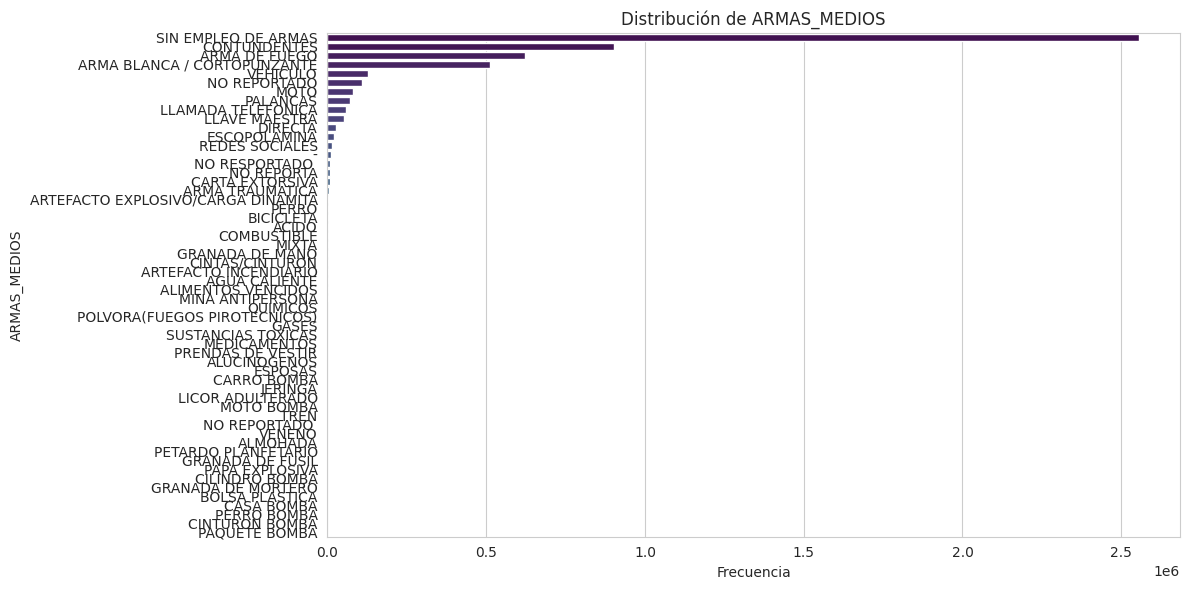

/tmp/ipython-input-538419659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


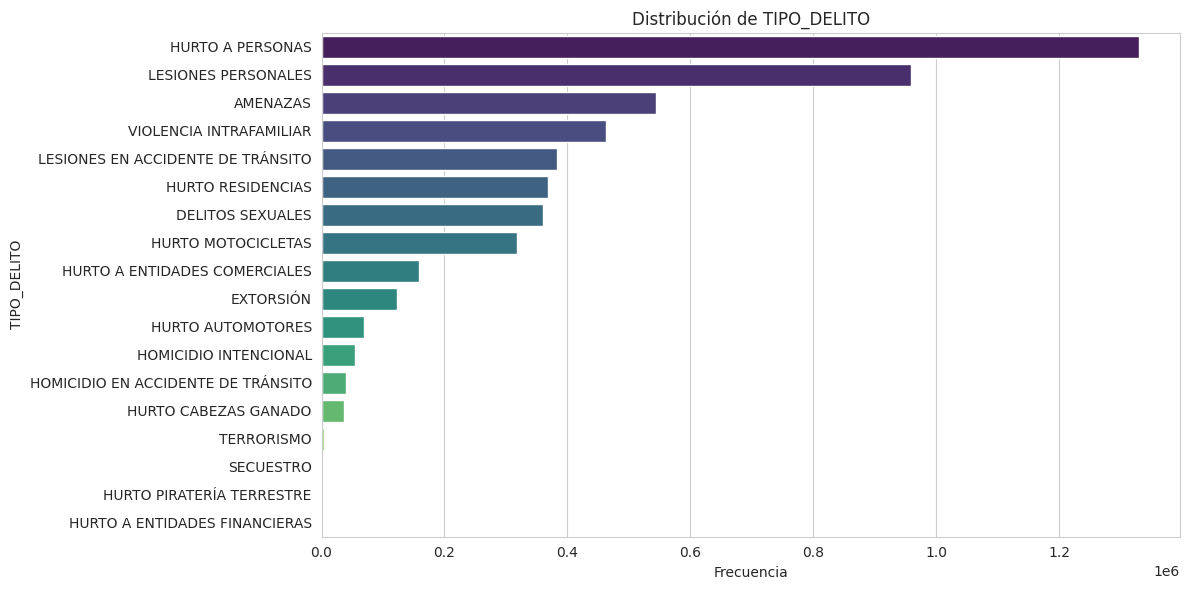

/tmp/ipython-input-538419659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


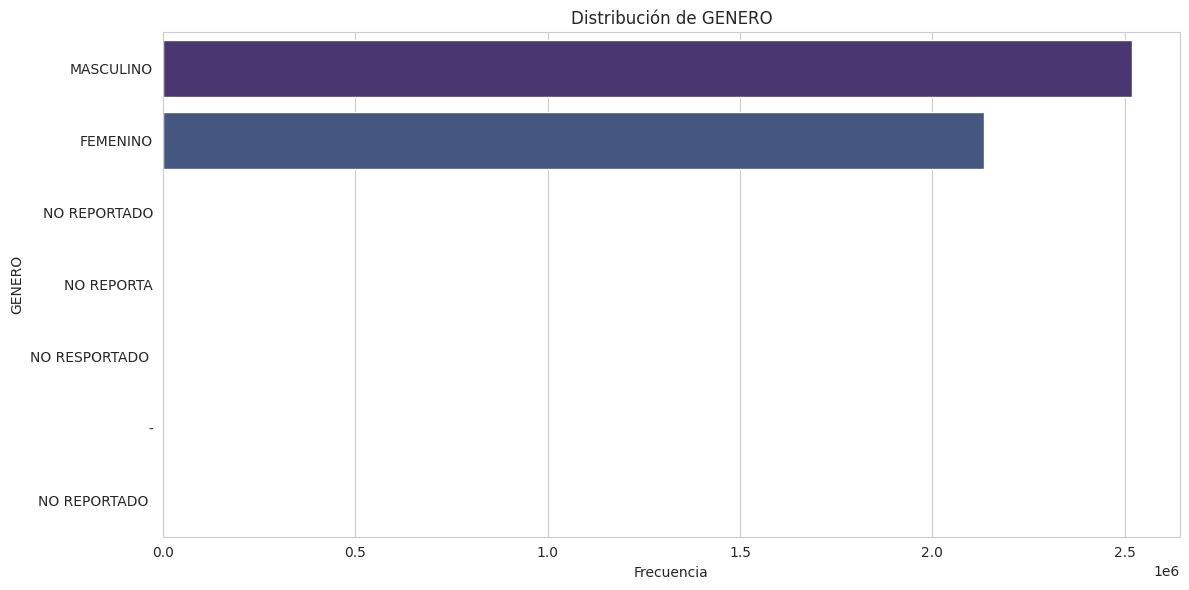

/tmp/ipython-input-538419659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


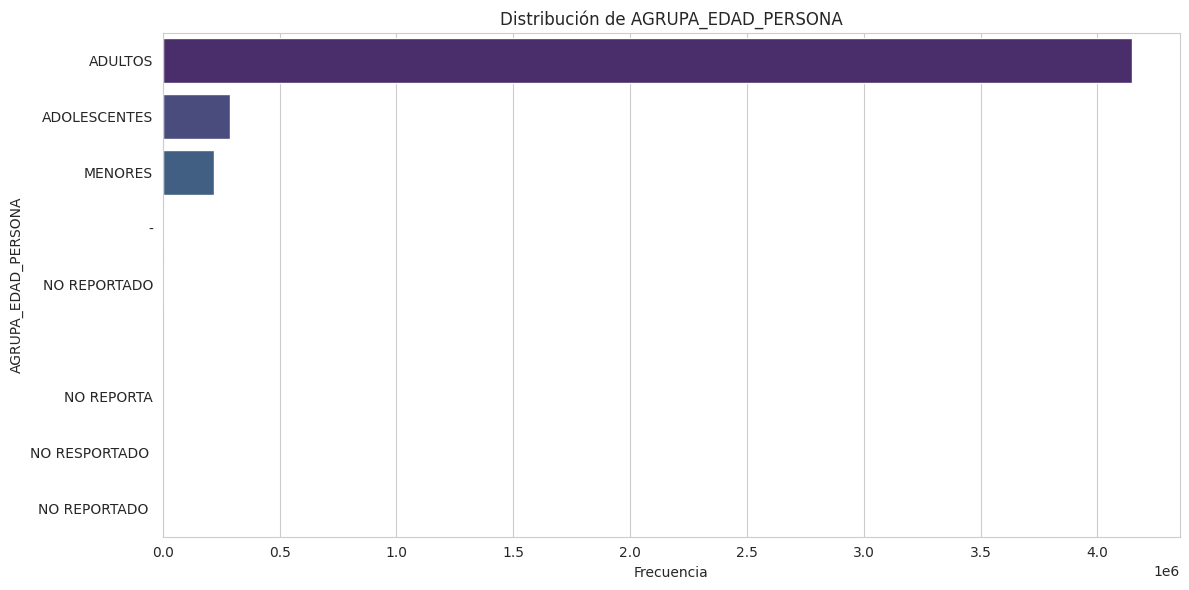

/tmp/ipython-input-538419659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


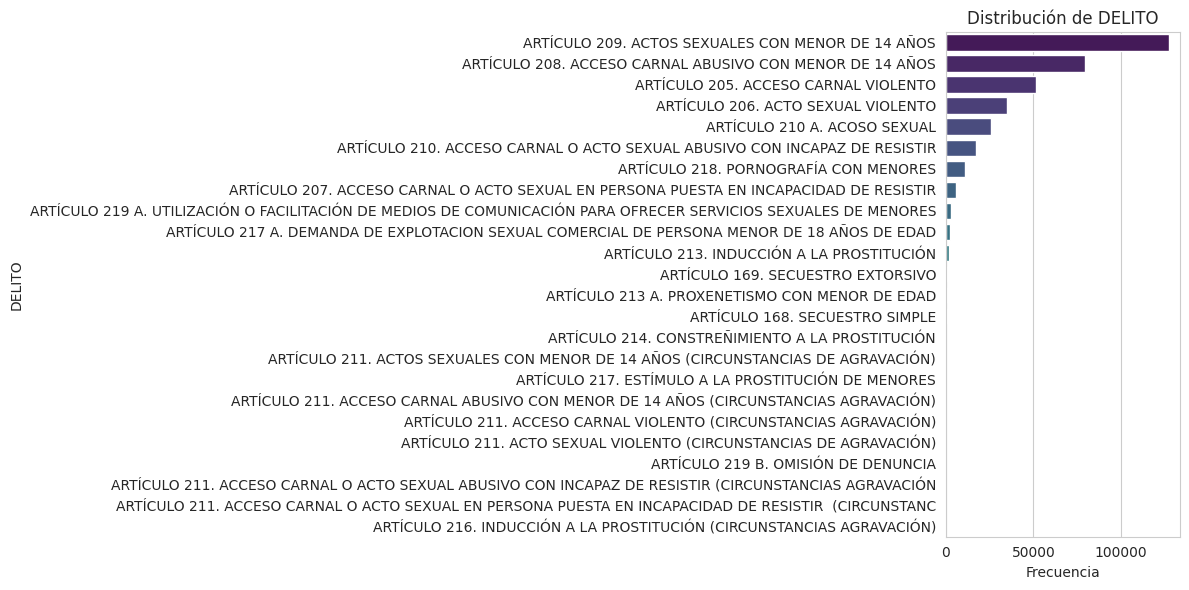

/tmp/ipython-input-538419659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


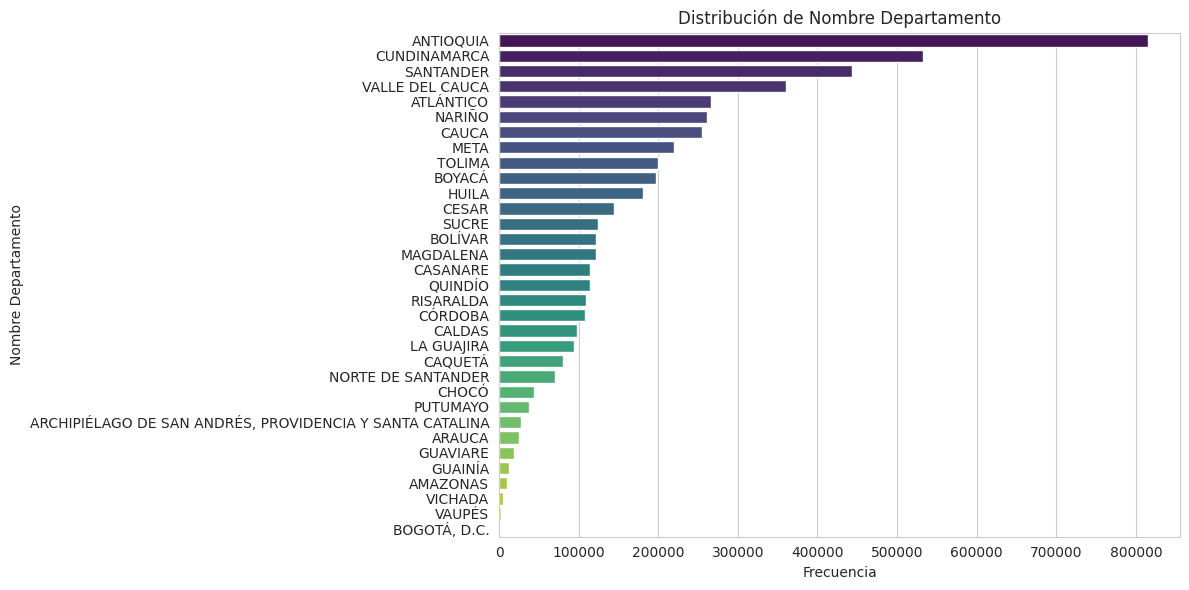

/tmp/ipython-input-538419659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


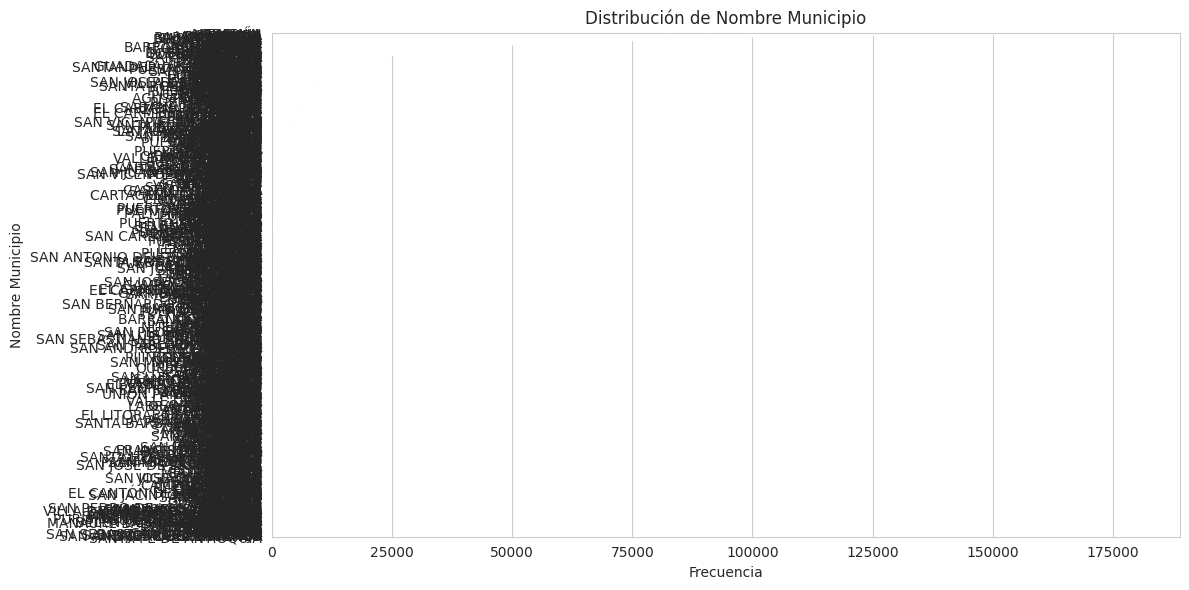

/tmp/ipython-input-538419659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


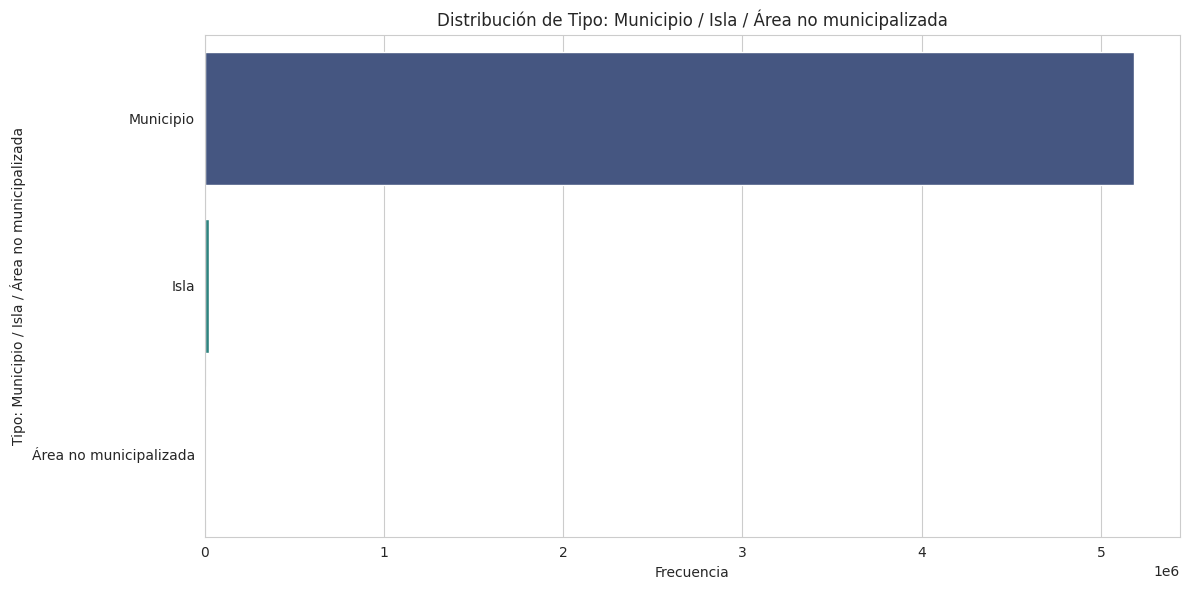

/tmp/ipython-input-538419659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


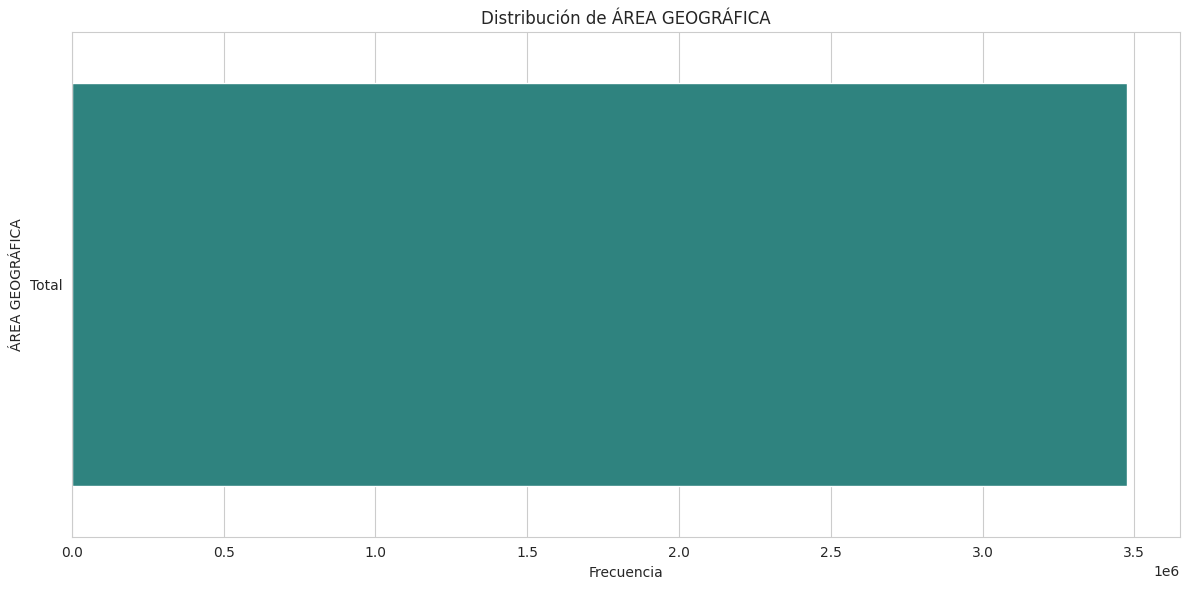

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las visualizaciones
sns.set_style("whitegrid")

# Seleccionar columnas categóricas (tipo 'object'), excluyendo 'longitud' y 'Latitud'
categorical_cols_to_visualize = [col for col in df.select_dtypes(include=['object']).columns if col not in ['longitud', 'Latitud']]

# Crear gráficos de barras para cada variable categórica
for col in categorical_cols_to_visualize:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Variables temporales

In [20]:


# Mostrar el valor mínimo y máximo de la columna 'AÑO'
print("\nRango de años:")
display(df['AÑO'].min())
display(df['AÑO'].max())

Rango de fechas:


Timestamp('2020-01-01 00:00:00')

Timestamp('2020-12-31 00:00:00')


Rango de años:


2020.0

2024.0

## Análisis de relaciones

## Análisis Bivariado

/tmp/ipython-input-1053319970.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)


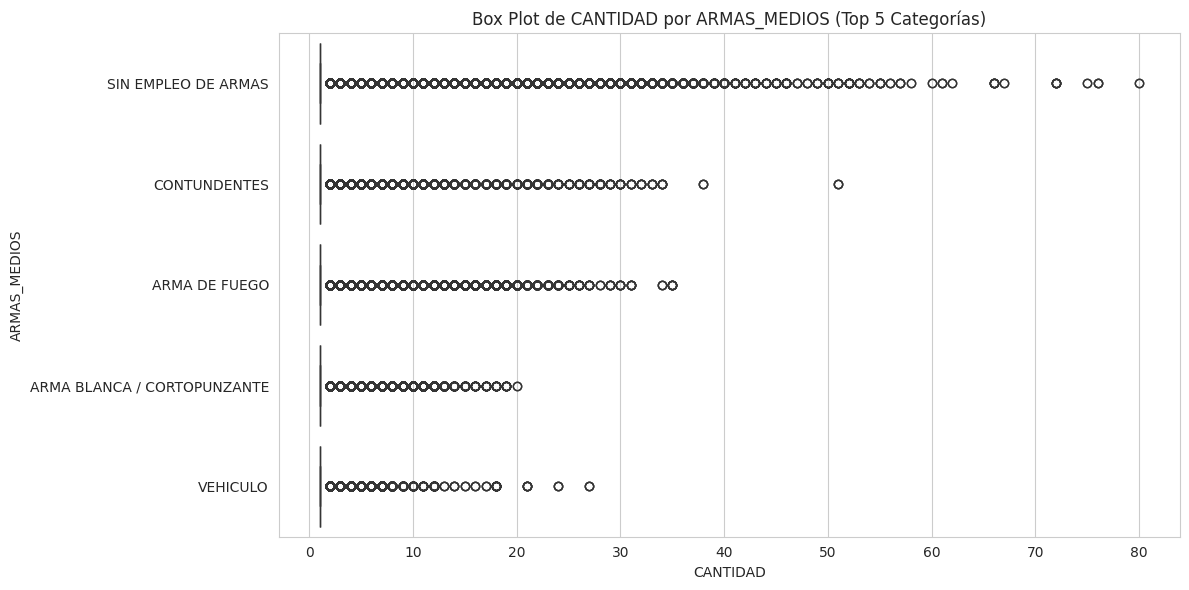

/tmp/ipython-input-1053319970.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)


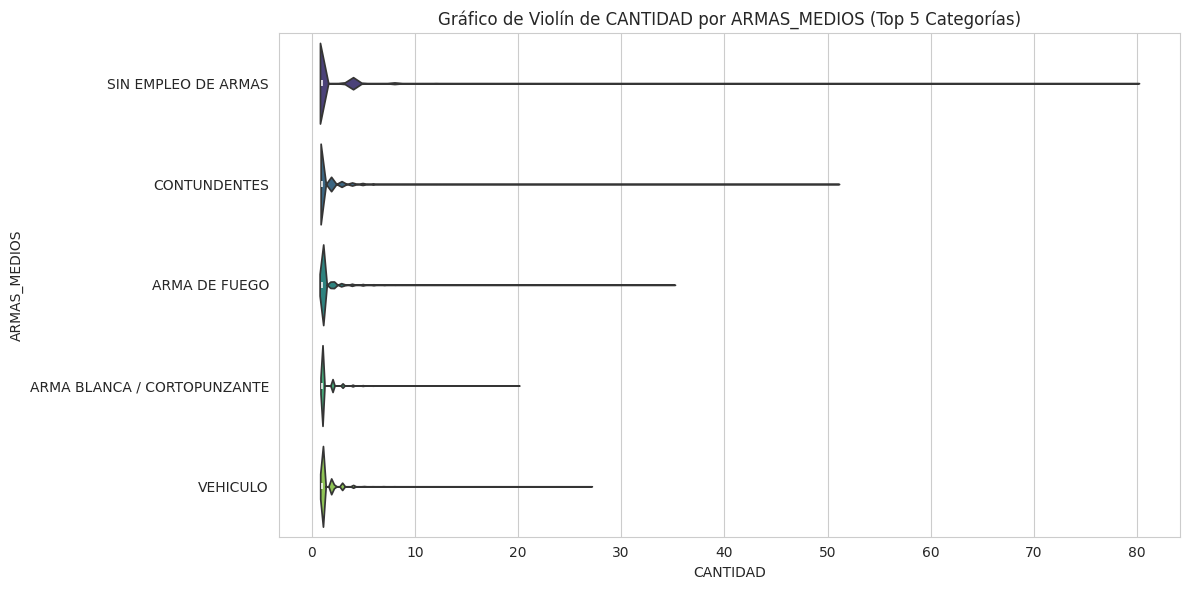

/tmp/ipython-input-1053319970.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)


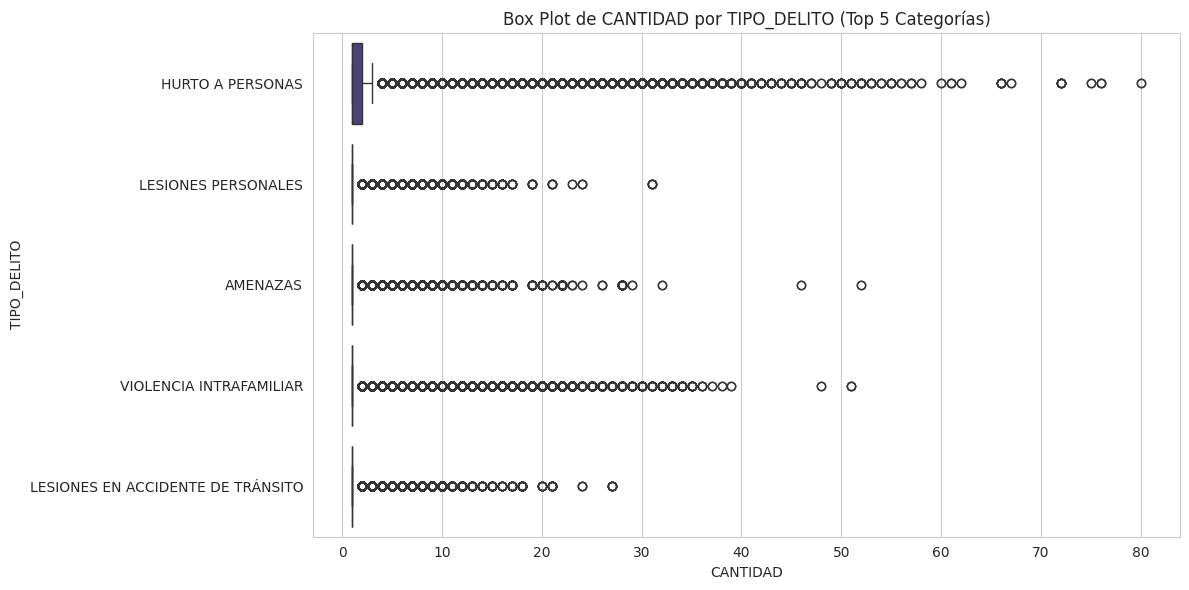

/tmp/ipython-input-1053319970.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)


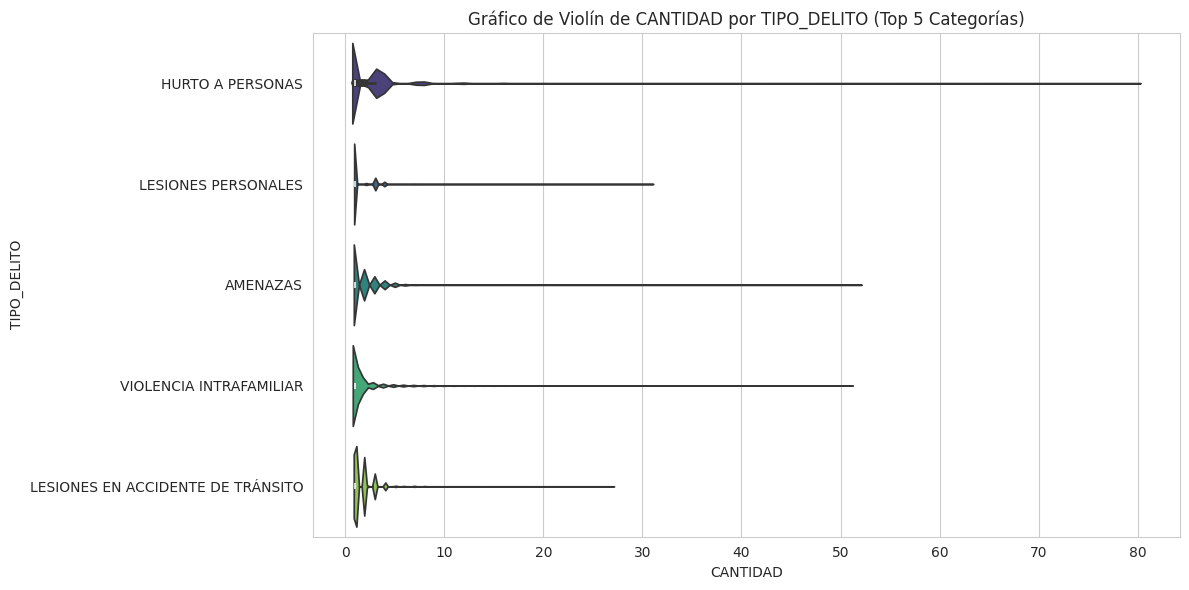

/tmp/ipython-input-1053319970.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)


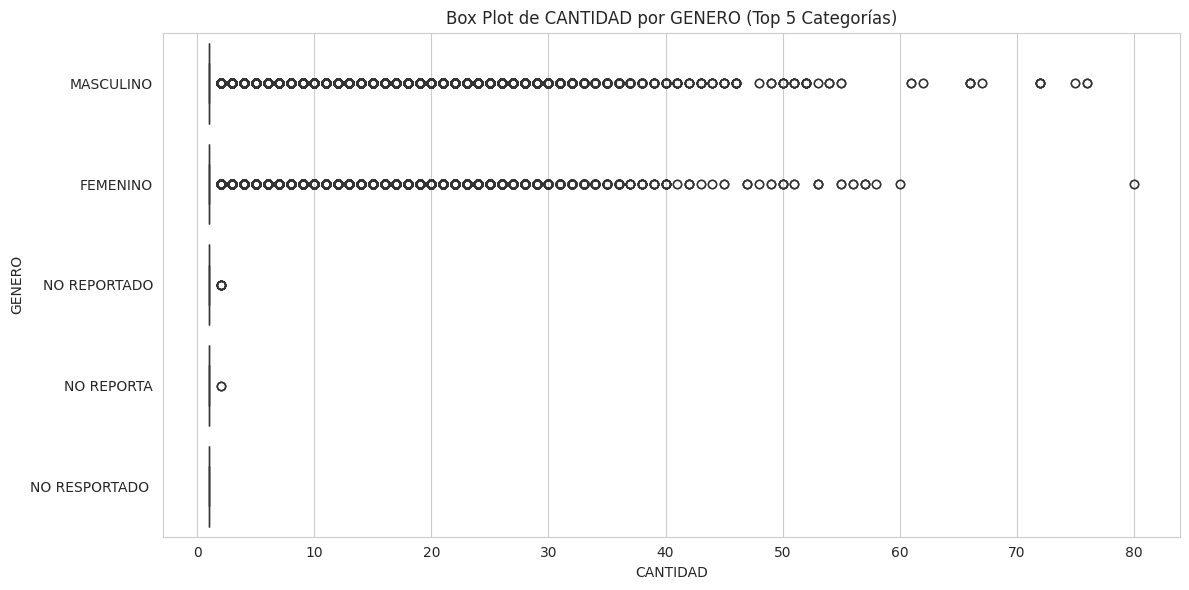

/tmp/ipython-input-1053319970.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)


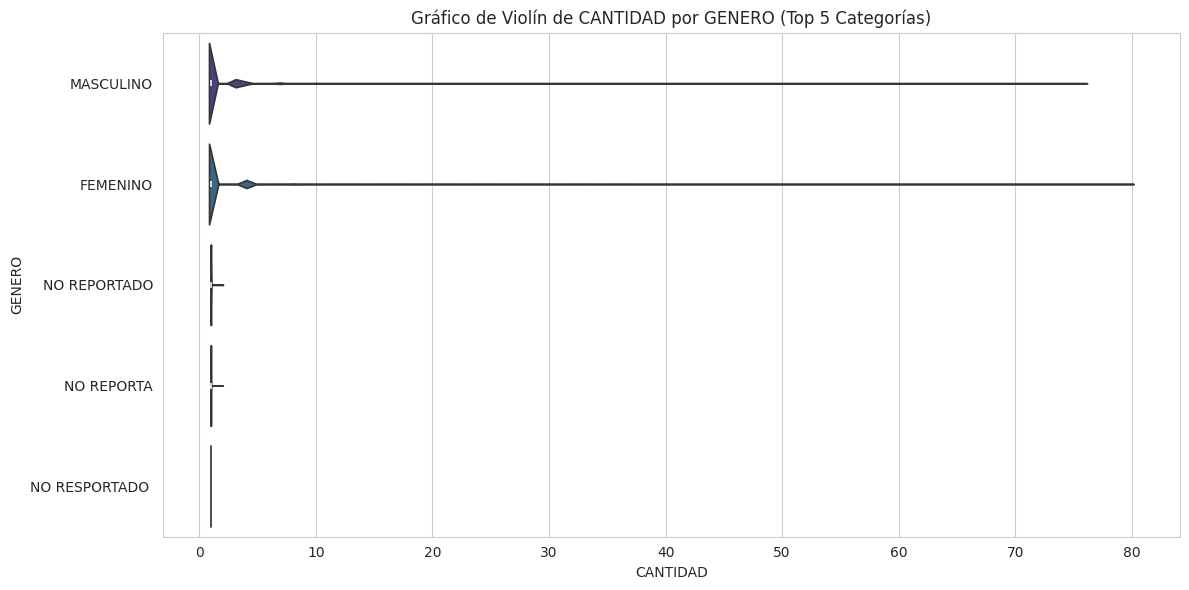

/tmp/ipython-input-1053319970.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)


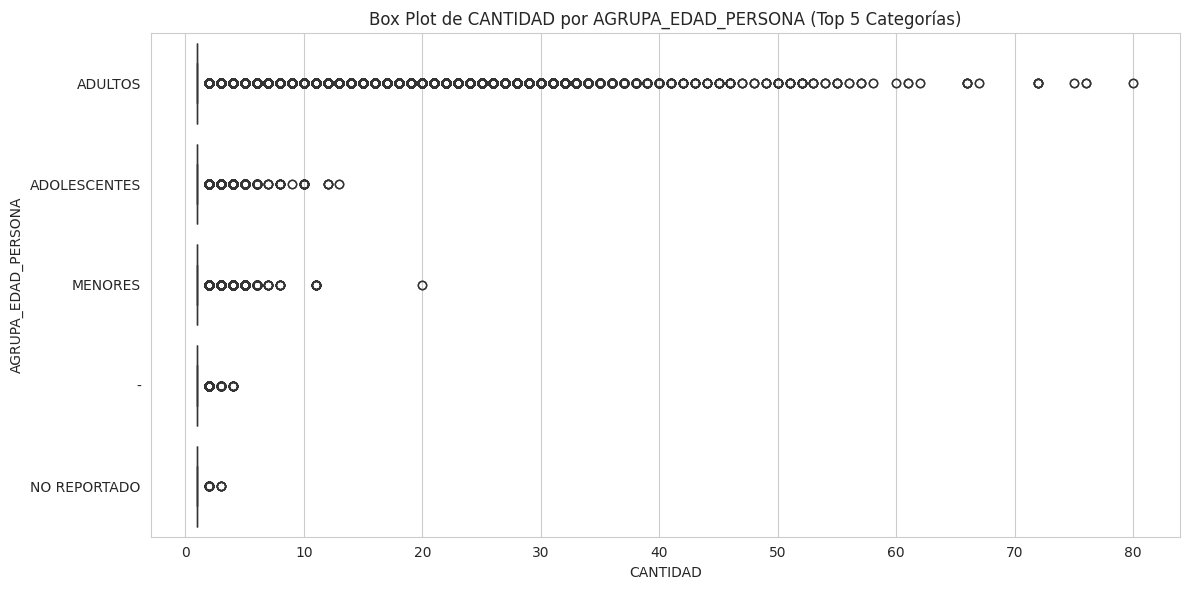

/tmp/ipython-input-1053319970.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)


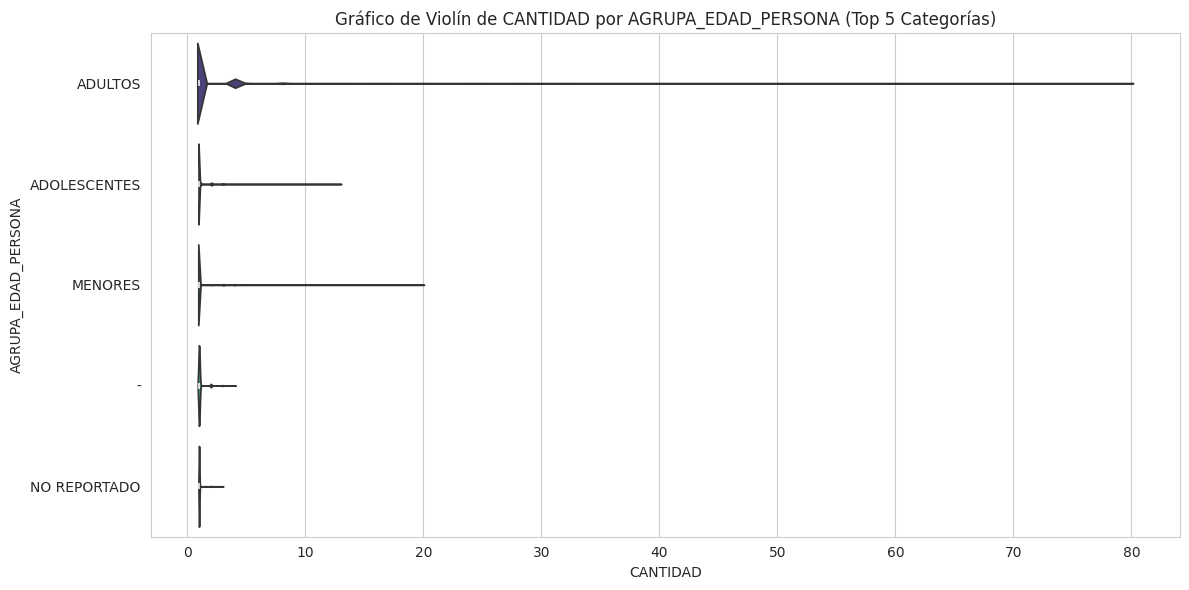

In [25]:
# Seleccionar algunas variables categóricas para el análisis bivariado
categorical_vars_for_bivariate = ['ARMAS_MEDIOS', 'TIPO_DELITO', 'GENERO', 'AGRUPA_EDAD_PERSONA']

# Crear box plots y gráficos de violín para cada variable categórica vs CANTIDAD
for col in categorical_vars_for_bivariate:
    if col in df.columns:
        # Get the top 5 categories
        top_5_categories = df[col].value_counts().nlargest(5).index
        df_filtered = df[df[col].isin(top_5_categories)]

        plt.figure(figsize=(12, 6))

        # Box plot
        sns.boxplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)
        plt.title(f'Box Plot de CANTIDAD por {col} (Top 5 Categorías)')
        plt.xlabel('CANTIDAD')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(12, 6))
        # Violin plot
        sns.violinplot(data=df_filtered, x='CANTIDAD', y=col, orient='h', palette='viridis', order=top_5_categories)
        plt.title(f'Gráfico de Violín de CANTIDAD por {col} (Top 5 Categorías)')
        plt.xlabel('CANTIDAD')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"La columna '{col}' no se encuentra en el DataFrame.")

In [26]:
# Crear una tabla de contingencia entre TIPO_DELITO y ARMAS_MEDIOS
contingency_table_delito_arma = pd.crosstab(df['TIPO_DELITO'], df['ARMAS_MEDIOS'])

# Mostrar la tabla de contingencia
print("\nTabla de contingencia: TIPO_DELITO vs ARMAS_MEDIOS")
display(contingency_table_delito_arma)

# Crear una tabla de contingencia entre GENERO y TIPO_DELITO
contingency_table_genero_delito = pd.crosstab(df['GENERO'], df['TIPO_DELITO'])

# Mostrar la tabla de contingencia
print("\nTabla de contingencia: GENERO vs TIPO_DELITO")
display(contingency_table_genero_delito)


Tabla de contingencia: TIPO_DELITO vs ARMAS_MEDIOS


ARMAS_MEDIOS,-,ACIDO,AGUA CALIENTE,ALIMENTOS VENCIDOS,ALMOHADA,ALUCINOGENOS,ARMA BLANCA / CORTOPUNZANTE,ARMA DE FUEGO,ARMA TRAUMATICA,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,...,PETARDO PLANFETARIO,POLVORA(FUEGOS PIROTECNICOS),PRENDAS DE VESTIR,QUIMICOS,REDES SOCIALES,SIN EMPLEO DE ARMAS,SUSTANCIAS TOXICAS,TREN,VEHICULO,VENENO
TIPO_DELITO,,,,,,,,,,,,,,,,,,,,,
AMENAZAS,10,0,0,0,0,0,17023,28868,0,0,...,0,0,0,0,0,447425,0,0,0,0
DELITOS SEXUALES,2,0,0,0,0,0,22791,1193,0,0,...,0,0,0,0,0,248241,0,0,0,0
EXTORSIÓN,144,0,0,0,0,0,0,0,0,0,...,0,0,0,0,15938,9760,0,0,0,0
HOMICIDIO EN ACCIDENTE DE TRÁNSITO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4423,0,42,16776,0
HOMICIDIO INTENCIONAL,0,0,0,0,0,0,9564,42889,0,216,...,0,0,0,0,0,0,0,0,0,0
HURTO A ENTIDADES COMERCIALES,0,0,0,0,0,0,4012,21735,0,0,...,0,0,0,0,0,94406,0,0,0,0
HURTO A ENTIDADES FINANCIERAS,0,0,0,0,0,0,0,698,0,0,...,0,0,0,0,0,198,0,0,0,0
HURTO A PERSONAS,5172,0,0,0,0,0,241405,320633,0,0,...,0,0,0,0,0,653089,0,0,0,0
HURTO AUTOMOTORES,48,0,0,0,0,0,1150,24758,0,0,...,0,0,0,0,0,33320,0,0,0,0



Tabla de contingencia: GENERO vs TIPO_DELITO


TIPO_DELITO,AMENAZAS,DELITOS SEXUALES,EXTORSIÓN,HOMICIDIO EN ACCIDENTE DE TRÁNSITO,HOMICIDIO INTENCIONAL,HURTO A PERSONAS,HURTO CABEZAS GANADO,HURTO RESIDENCIAS,LESIONES EN ACCIDENTE DE TRÁNSITO,LESIONES PERSONALES,SECUESTRO,VIOLENCIA INTRAFAMILIAR
GENERO,,,,,,,,,,,,
-,0,0,0,0,0,0,96,0,0,21,0,0
FEMENINO,213937,308769,36129,7413,4682,547307,7348,154555,130957,374895,730,347696
MASCULINO,328585,50321,82216,32335,50395,782236,28258,213183,251106,583958,2324,112701
NO REPORTA,0,0,1150,0,0,51,0,0,0,0,0,0
NO REPORTADO,198,348,603,0,0,3,0,0,207,117,0,21
NO REPORTADO,0,0,0,0,0,0,0,0,0,114,0,0
NO RESPORTADO,0,207,702,3,0,0,51,3,63,0,0,0


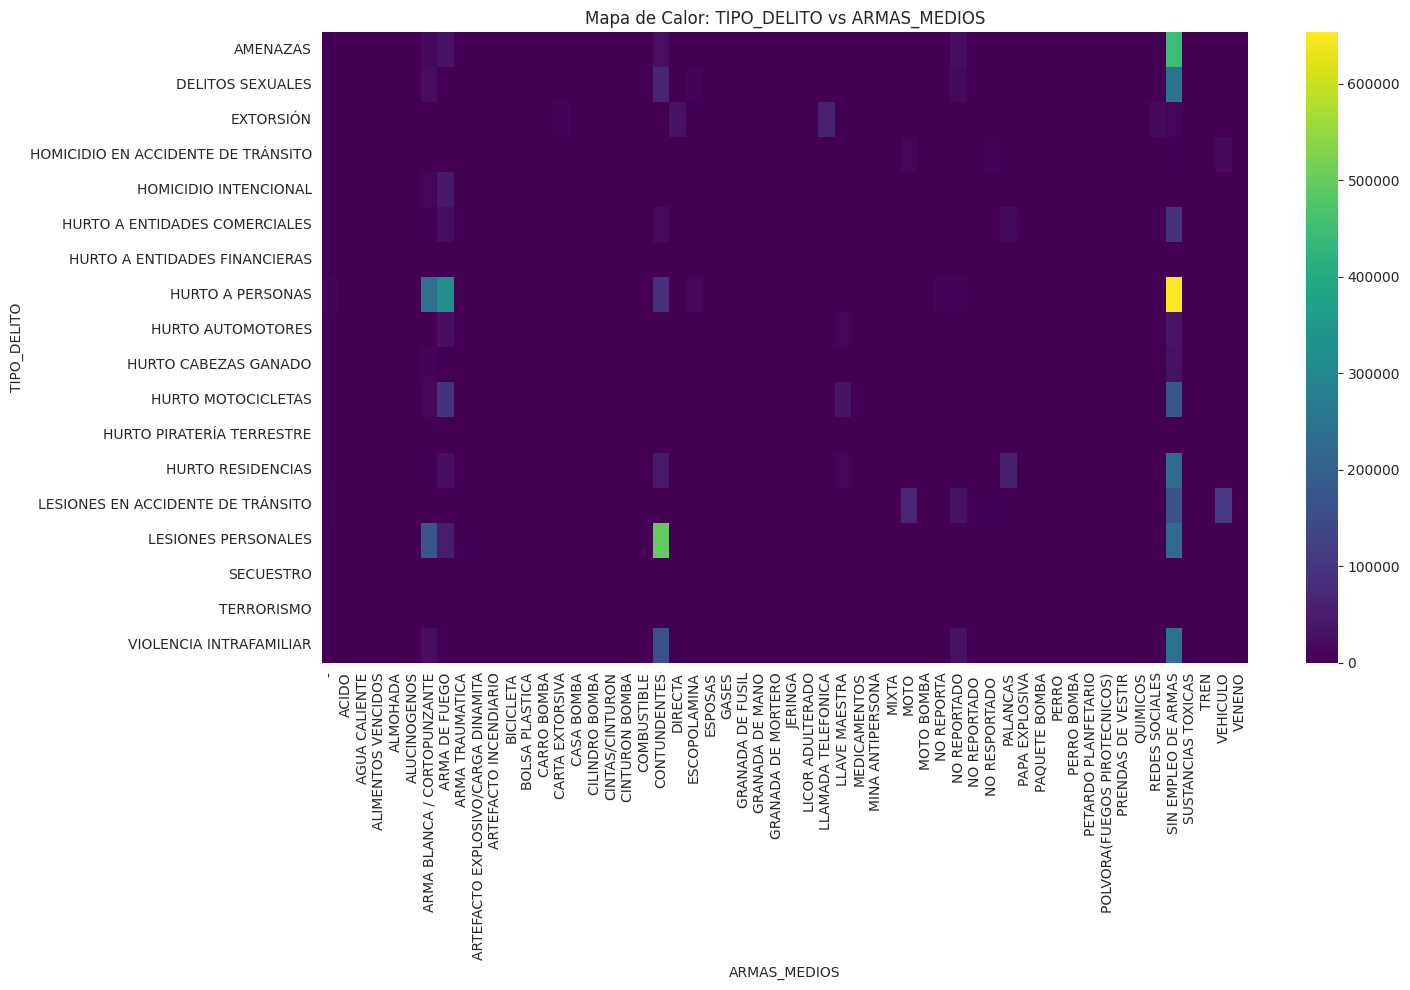

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un mapa de calor de la tabla de contingencia
plt.figure(figsize=(15, 10)) # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(contingency_table_delito_arma, annot=False, cmap='viridis', fmt='d') # annot=True si quieres ver los números en el mapa de calor
plt.title('Mapa de Calor: TIPO_DELITO vs ARMAS_MEDIOS')
plt.xlabel('ARMAS_MEDIOS')
plt.ylabel('TIPO_DELITO')
plt.tight_layout()
plt.show()

## Análisis multivariado

In [28]:
# Agrupar por TIPO_DELITO, ARMAS_MEDIOS y GENERO y sumar la CANTIDAD
multivariate_analysis_result = df.groupby(['TIPO_DELITO', 'ARMAS_MEDIOS', 'GENERO'])['CANTIDAD'].sum().reset_index()

# Mostrar las primeras filas del resultado
print("Cantidad total de delitos por Tipo de Delito, Arma/Medio y Género:")
display(multivariate_analysis_result.head())

# Opcional: Mostrar las combinaciones con mayor cantidad de delitos
print("\nCombinaciones con mayor cantidad de delitos:")
display(multivariate_analysis_result.nlargest(10, 'CANTIDAD'))

Cantidad total de delitos por Tipo de Delito, Arma/Medio y Género:


,TIPO_DELITO,ARMAS_MEDIOS,GENERO,CANTIDAD
0,AMENAZAS,-,FEMENINO,4.0
1,AMENAZAS,-,MASCULINO,6.0
2,AMENAZAS,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,7436.0
3,AMENAZAS,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,11517.0
4,AMENAZAS,ARMA DE FUEGO,FEMENINO,9670.0



Combinaciones con mayor cantidad de delitos:


,TIPO_DELITO,ARMAS_MEDIOS,GENERO,CANTIDAD
126,HURTO A PERSONAS,SIN EMPLEO DE ARMAS,MASCULINO,683559.0
125,HURTO A PERSONAS,SIN EMPLEO DE ARMAS,FEMENINO,606976.0
109,HURTO A PERSONAS,ARMA DE FUEGO,MASCULINO,383871.0
13,AMENAZAS,SIN EMPLEO DE ARMAS,MASCULINO,368123.0
223,LESIONES PERSONALES,CONTUNDENTES,MASCULINO,345982.0
222,LESIONES PERSONALES,CONTUNDENTES,FEMENINO,279082.0
284,VIOLENCIA INTRAFAMILIAR,SIN EMPLEO DE ARMAS,FEMENINO,278933.0
12,AMENAZAS,SIN EMPLEO DE ARMAS,FEMENINO,227219.0
34,DELITOS SEXUALES,SIN EMPLEO DE ARMAS,FEMENINO,226650.0
107,HURTO A PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,226077.0


<Figure size 1500x800 with 0 Axes>

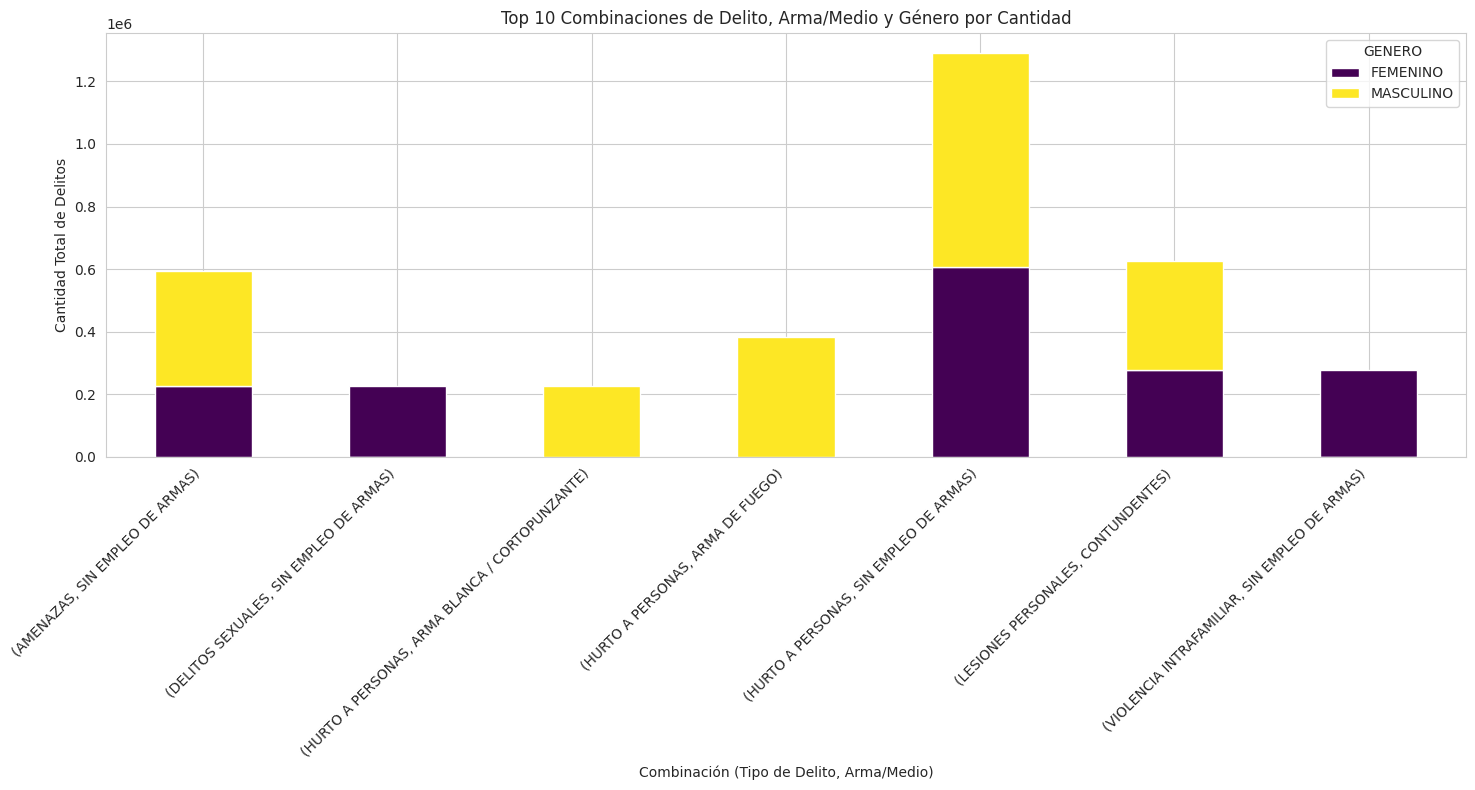

In [29]:
# Seleccionar las 10 combinaciones con mayor cantidad de delitos
top_10_combinations = multivariate_analysis_result.nlargest(10, 'CANTIDAD')

# Para el gráfico apilado, podemos pivotar la tabla o usar seaborn con hue
# Pivotar para tener GENERO como columnas
pivot_table = top_10_combinations.pivot_table(index=['TIPO_DELITO', 'ARMAS_MEDIOS'], columns='GENERO', values='CANTIDAD', fill_value=0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(15, 8))
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('Top 10 Combinaciones de Delito, Arma/Medio y Género por Cantidad')
plt.xlabel('Combinación (Tipo de Delito, Arma/Medio)')
plt.ylabel('Cantidad Total de Delitos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Las combinaciones con mayor cantidad de delitos son consistentemente HURTO A PERSONAS (robo a personas) con SIN EMPLEO DE ARMAS (sin uso de armas), tanto para hombres (MASCULINO) como para mujeres (FEMENINO). Esto sugiere que el robo sin armas es el delito más frecuente en general.

Otras combinaciones importantes incluyen HURTO A PERSONAS con ARMA DE FUEGO en hombres, y LESIONES PERSONALES con CONTUNDENTES (objetos contundentes) tanto en hombres como en mujeres.

La VIOLENCIA INTRAFAMILIAR, SIN EMPLEO DE ARMAS, es significativa, especialmente en mujeres, lo que resalta la prevalencia de este tipo de violencia sin el uso explícito de armas.

En general, en la mayoría de las combinaciones principales, la cantidad de delitos es mayor para el género MASCULINO, aunque hay excepciones notables como DELITOS SEXUALES y VIOLENCIA INTRAFAMILIAR con SIN EMPLEO DE ARMAS, donde la cantidad en el género FEMENINO es muy alta o predominante.

Este análisis inicial nos da una idea clara de los tipos de delitos más comunes y cómo se asocian con ciertos medios y géneros.

In [30]:
# Agrupar por Nombre Municipio, GENERO y TIPO_DELITO y sumar la CANTIDAD
grouped_municipio_genero_delito = df.groupby(['Nombre Municipio', 'GENERO', 'TIPO_DELITO'])['CANTIDAD'].sum().reset_index()

# Mostrar las primeras filas del resultado
print("Cantidad total de delitos por Nombre de Municipio, Género y Tipo de Delito:")
display(grouped_municipio_genero_delito.head())

# Opcional: Mostrar las combinaciones con mayor cantidad de delitos
print("\nCombinaciones con mayor cantidad de delitos:")
display(grouped_municipio_genero_delito.nlargest(10, 'CANTIDAD'))

Cantidad total de delitos por Nombre de Municipio, Género y Tipo de Delito:


,Nombre Municipio,GENERO,TIPO_DELITO,CANTIDAD
0,ABEJORRAL,FEMENINO,AMENAZAS,40.0
1,ABEJORRAL,FEMENINO,DELITOS SEXUALES,130.0
2,ABEJORRAL,FEMENINO,EXTORSIÓN,5.0
3,ABEJORRAL,FEMENINO,HOMICIDIO EN ACCIDENTE DE TRÁNSITO,3.0
4,ABEJORRAL,FEMENINO,HOMICIDIO INTENCIONAL,4.0



Combinaciones con mayor cantidad de delitos:


,Nombre Municipio,GENERO,TIPO_DELITO,CANTIDAD
9343,MEDELLÍN,MASCULINO,HURTO A PERSONAS,197328.0
9331,MEDELLÍN,FEMENINO,HURTO A PERSONAS,128050.0
1617,BARRANQUILLA,MASCULINO,HURTO A PERSONAS,84402.0
1196,ARMENIA,MASCULINO,HURTO A PERSONAS,53580.0
9337,MEDELLÍN,FEMENINO,VIOLENCIA INTRAFAMILIAR,53356.0
1605,BARRANQUILLA,FEMENINO,HURTO A PERSONAS,49590.0
15900,SOACHA,MASCULINO,HURTO A PERSONAS,46552.0
2012,BUCARAMANGA,FEMENINO,HURTO A PERSONAS,44613.0
2023,BUCARAMANGA,MASCULINO,HURTO A PERSONAS,44530.0
1185,ARMENIA,FEMENINO,HURTO A PERSONAS,41752.0


<Figure size 1500x800 with 0 Axes>

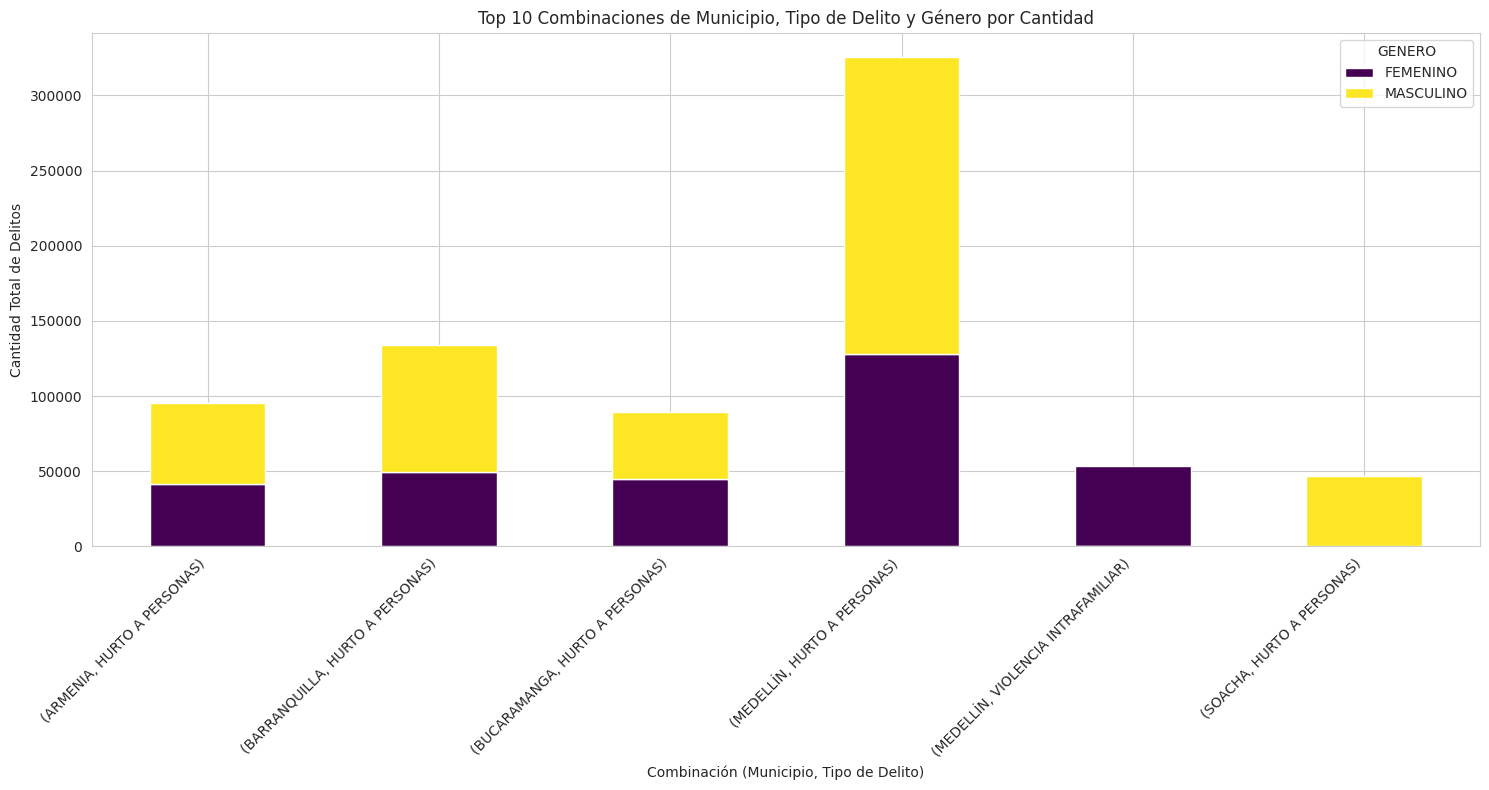

In [31]:
# Seleccionar las 10 combinaciones con mayor cantidad de delitos de la tabla agrupada
top_10_municipio_combinations = grouped_municipio_genero_delito.nlargest(10, 'CANTIDAD')

# Pivotear la tabla para tener GENERO como columnas para el gráfico apilado
pivot_municipio_table = top_10_municipio_combinations.pivot_table(index=['Nombre Municipio', 'TIPO_DELITO'], columns='GENERO', values='CANTIDAD', fill_value=0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(15, 8))
pivot_municipio_table.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('Top 10 Combinaciones de Municipio, Tipo de Delito y Género por Cantidad')
plt.xlabel('Combinación (Municipio, Tipo de Delito)')
plt.ylabel('Cantidad Total de Delitos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Análisis del Top 10 Combinaciones de Municipio, Tipo de Delito y Género por Cantidad:**

El gráfico de barras apiladas de las 10 combinaciones principales de Municipio, Tipo de Delito y Género por Cantidad revela los focos de mayor actividad delictiva en el conjunto de datos:

*   **Predominio del Hurto a Personas:** Similar al análisis multivariado anterior, el "HURTO A PERSONAS" es el tipo de delito más recurrente en las combinaciones principales, apareciendo en 8 de las 10 combinaciones.
*   **Municipios con Mayor Cantidad de Delitos en el Top 10:** MEDELLÍN, BARRANQUILLA y ARMENIA son los municipios que más aparecen en este top 10, lo que indica que concentran un alto volumen de delitos en las categorías más frecuentes. SOACHA y BUCARAMANGA también figuran en el top 10.
*   **Distribución por Género:** En la mayoría de las combinaciones de "HURTO A PERSONAS", la cantidad de delitos reportados para el género MASCULINO es mayor que para el FEMENINO.
*   **Excepciones Notables:** La combinación de MEDELLÍN, FEMENINO y VIOLENCIA INTRAFAMILIAR es una excepción importante, mostrando una alta cantidad de delitos concentrada en mujeres en este municipio para este tipo de delito.
*   **Combinaciones Específicas Relevantes:** Las combinaciones de MEDELLÍN - MASCULINO - HURTO A PERSONAS, MEDELLÍN - FEMENINO - HURTO A PERSONAS, y BARRANQUILLA - MASCULINO - HURTO A PERSONAS son las que presentan las mayores cantidades de delitos individuales en el top 10.

Este análisis subraya la importancia del hurto a personas en las principales áreas urbanas representadas en el conjunto de datos y destaca la necesidad de considerar las diferencias de género en la incidencia de ciertos delitos como el hurto y la violencia intrafamiliar.

### Geográfico

In [32]:
# Reemplazar comas por puntos en las columnas de longitud y latitud
df['longitud'] = df['longitud'].astype(str).str.replace(',', '.')
df['Latitud'] = df['Latitud'].astype(str).str.replace(',', '.')

# Convertir las columnas de longitud y latitud a tipo numérico (float)
# Usamos errors='coerce' para convertir valores no válidos a NaN
df['longitud'] = pd.to_numeric(df['longitud'], errors='coerce')
df['Latitud'] = pd.to_numeric(df['Latitud'], errors='coerce')

# Verificar los tipos de datos después de la transformación
print("Tipos de datos después de la transformación:")
display(df[['longitud', 'Latitud']].dtypes)

# Mostrar algunas filas para verificar la transformación
print("\nPrimeras filas después de la transformación:")
display(df[['longitud', 'Latitud']].head())

Tipos de datos después de la transformación:


,0
longitud,float64
Latitud,float64



Primeras filas después de la transformación:


,longitud,Latitud
0,-75.581775,6.246631
1,-75.581775,6.246631
2,-75.581775,6.246631
3,-75.581775,6.246631
4,-75.581775,6.246631


In [34]:
import folium

# Calcular la cantidad total de delitos por municipio
municipio_crime_counts = df.groupby(['Nombre Municipio', 'Latitud', 'longitud'])['CANTIDAD'].sum().reset_index()

# Eliminar filas con valores faltantes en Latitud o longitud después de la agrupación
municipio_crime_counts.dropna(subset=['Latitud', 'longitud'], inplace=True)

# Seleccionar los 15 municipios con mayor cantidad de delitos
top_15_municipios = municipio_crime_counts.nlargest(15, 'CANTIDAD')

# Crear un mapa base centrado en Colombia
colombia_center = [4.5709, -74.2973]
m = folium.Map(location=colombia_center, zoom_start=6)

# Agregar marcadores para los 15 municipios principales
for index, row in top_15_municipios.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['longitud']],
        popup=f"{row['Nombre Municipio']}: {int(row['CANTIDAD'])} delitos",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Mostrar el mapa
m

El mapa ilustra los municipios con mayor cantidad de delitos. Al ponen el cursor sobre el símbolo, aparece su múmero.

## Resumen de Hallazgos del Análisis

Aquí se presenta un resumen de los principales hallazgos obtenidos durante el análisis exploratorio de la base de datos consolidada:

1.  **Carga de Datos:** Los datos se cargaron correctamente desde el archivo CSV, aunque se identificó una advertencia sobre tipos de datos mixtos en la columna 15 (`ÁREA GEOGRÁFICA`), lo cual es común en archivos grandes y se manejó implícitamente al cargar el DataFrame.

2.  **Datos Faltantes:** Se identificó la presencia de valores faltantes en varias columnas, siendo `FECHA` la que presenta la mayor cantidad (más del 99%), seguida por `DELITO`, `ÁREA GEOGRÁFICA`, `GENERO` y `AGRUPA_EDAD_PERSONA`. La gran cantidad de faltantes en `FECHA` limita los análisis temporales basados en esta columna.

3.  **Variables Numéricas:** Las columnas identificadas como numéricas son `CANTIDAD`, `Código Departamento`, `Código Municipio`, `AÑO` y `TOTAL`. Se observó que los códigos son categóricos por naturaleza.
    *   **Estadísticas Descriptivas (`CANTIDAD` y `TOTAL`):** Se calcularon medidas de tendencia central y dispersión para `CANTIDAD` y `TOTAL`. La mayoría de los registros en `CANTIDAD` son 1, aunque existen valores atípicos que se reflejan en la desviación estándar. `TOTAL` parece representar la población y varía ampliamente.
    *   **Visualizaciones Numéricas:** Los histogramas de `CANTIDAD` mostraron una distribución sesgada hacia 1, con picos en valores bajos, indicando la naturaleza de conteo unitario de la mayoría de los delitos. El histograma de `TOTAL` mostró una distribución sesgada, lo cual es esperado para datos de población de diferentes municipios.
4.  **Variables Categóricas:** Se identificaron las columnas de tipo 'object' como categóricas, incluyendo `ARMAS_MEDIOS`, `TIPO_DELITO`, `GENERO`, `AGRUPA_EDAD_PERSONA`, `DELITO`, columnas geográficas y `ÁREA GEOGRÁFICA`. Se notó que `longitud` y `Latitud` fueron identificadas inicialmente como categóricas debido al formato con comas.
    *   **Frecuencias Categóricas:** Se mostraron las frecuencias de cada categoría, destacando la predominancia de "SIN EMPLEO DE ARMAS" en `ARMAS_MEDIOS` y "HURTO A PERSONAS" en `TIPO_DELITO`. Se identificaron inconsistencias en las etiquetas de `GENERO` y `AGRUPA_EDAD_PERSONA` ("NO REPORTADO", "NO REPORTA", "-").
    *   **Visualizaciones Categóricas:** Los gráficos de barras confirmaron visualmente las distribuciones de frecuencia de las variables categóricas (excluyendo longitud y latitud), haciendo evidentes las categorías más comunes y las posibles inconsistencias en las etiquetas.
5.  **Variables Temporales:** Se identificaron `FECHA` y `AÑO` como variables temporales.
    *   **Rangos Temporales:** Se obtuvieron los rangos de fechas (2020) y años (2020-2024). La discrepancia sugiere una alta tasa de datos faltantes en la columna `FECHA` para años posteriores a 2020. La columna `AÑO` es más completa para análisis a nivel anual.
6.  **Análisis Bivariado:**
    *   **Categóricas vs CANTIDAD:** Se realizaron box plots y gráficos de violín para las 5 categorías principales de `ARMAS_MEDIOS`, `TIPO_DELITO`, `GENERO` y `AGRUPA_EDAD_PERSONA` frente a `CANTIDAD`. Esto mostró cómo la distribución de la cantidad varía para las categorías más frecuentes.
    *   **Tablas de Contingencia:** Se crearon tablas de contingencia para `TIPO_DELITO` vs `ARMAS_MEDIOS` y `GENERO` vs `TIPO_DELITO`, mostrando la co-ocurrencia de categorías.
    *   **Visualización de Contingencia:** Un mapa de calor de `TIPO_DELITO` vs `ARMAS_MEDIOS` visualizó las combinaciones más frecuentes, destacando la asociación entre ciertos delitos y tipos de armas/medios.
7.  **Análisis Multivariado:**
    *   **Agrupación (Delito, Arma/Medio, Género):** Se calculó la cantidad total de delitos agrupando por `TIPO_DELITO`, `ARMAS_MEDIOS` y `GENERO`. Las 10 combinaciones principales revelaron el predominio del "HURTO A PERSONAS" sin armas, con una mayor cantidad en el género masculino en la mayoría de los casos.
    *   **Visualización Multivariada (Top 10 Delito, Arma/Medio, Género):** Un gráfico de barras apiladas visualizó estas 10 combinaciones principales, mostrando la distribución de la cantidad por género dentro de cada combinación. Se destacó la excepción de "VIOLENCIA INTRAFAMILIAR" sin armas, con alta incidencia en mujeres.
    *   **Agrupación (Municipio, Género, Tipo de Delito):** Se calculó la cantidad total de delitos agrupando por `Nombre Municipio`, `GENERO` y `TIPO_DELITO`. Las 10 combinaciones principales identificaron a MEDELLÍN, BARRANQUILLA y ARMENIA como municipios con alto volumen de delitos, principalmente "HURTO A PERSONAS".
    *   **Visualización Multivariada (Top 10 Municipio, Delito, Género):** Un gráfico de barras apiladas visualizó estas 10 combinaciones principales, confirmando que el hurto a personas es el delito más común en los municipios principales y mostrando la distribución por género, incluida la excepción de la violencia intrafamiliar en Medellín.
8.  **Análisis Geográfico:**
    *   **Transformación de Coordenadas:** Las columnas `longitud` y `Latitud` se limpiaron (reemplazando comas por puntos) y se convirtieron a tipo numérico para permitir el análisis espacial.
    *   **Visualización Geográfica (Top 15 Municipios):** Se creó un mapa interactivo con marcadores que muestran la ubicación de los 15 municipios con la mayor cantidad total de delitos, permitiendo visualizar geográficamente las áreas de alta incidencia criminal.

Este resumen consolida los hallazgos clave de la exploración inicial de los datos, identificando patrones en la distribución de delitos por tipo, arma/medio, género y ubicación, así como la presencia de datos faltantes e inconsistencias.